# About Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv


In [2]:
import pandas as pd

df = pd.read_csv("/kaggle/input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv")

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


# Data Preprocessing and EDA

In [4]:
# Data Modification

df.Revenue = df.Revenue.astype(int)
df.Weekend = df.Weekend.astype(int)
df.VisitorType = df.VisitorType.replace(
    {'Returning_Visitor': '0', 
    'Other': '2',
    'New_Visitor': '1', 
    }).astype(int)
df.Month = df.Month.replace(
    {'Jan': '1',
    'Feb': '2', 
    'Mar': '3', 
    'Apr': '4',
    'May': '5', 
    'June': '6', 
    'Jul': '7', 
    'Aug': '8', 
    'Sep': '9', 
    'Oct': '10', 
    'Nov': '11', 
    'Dec': '12',
    }).astype(int)

<Axes: >

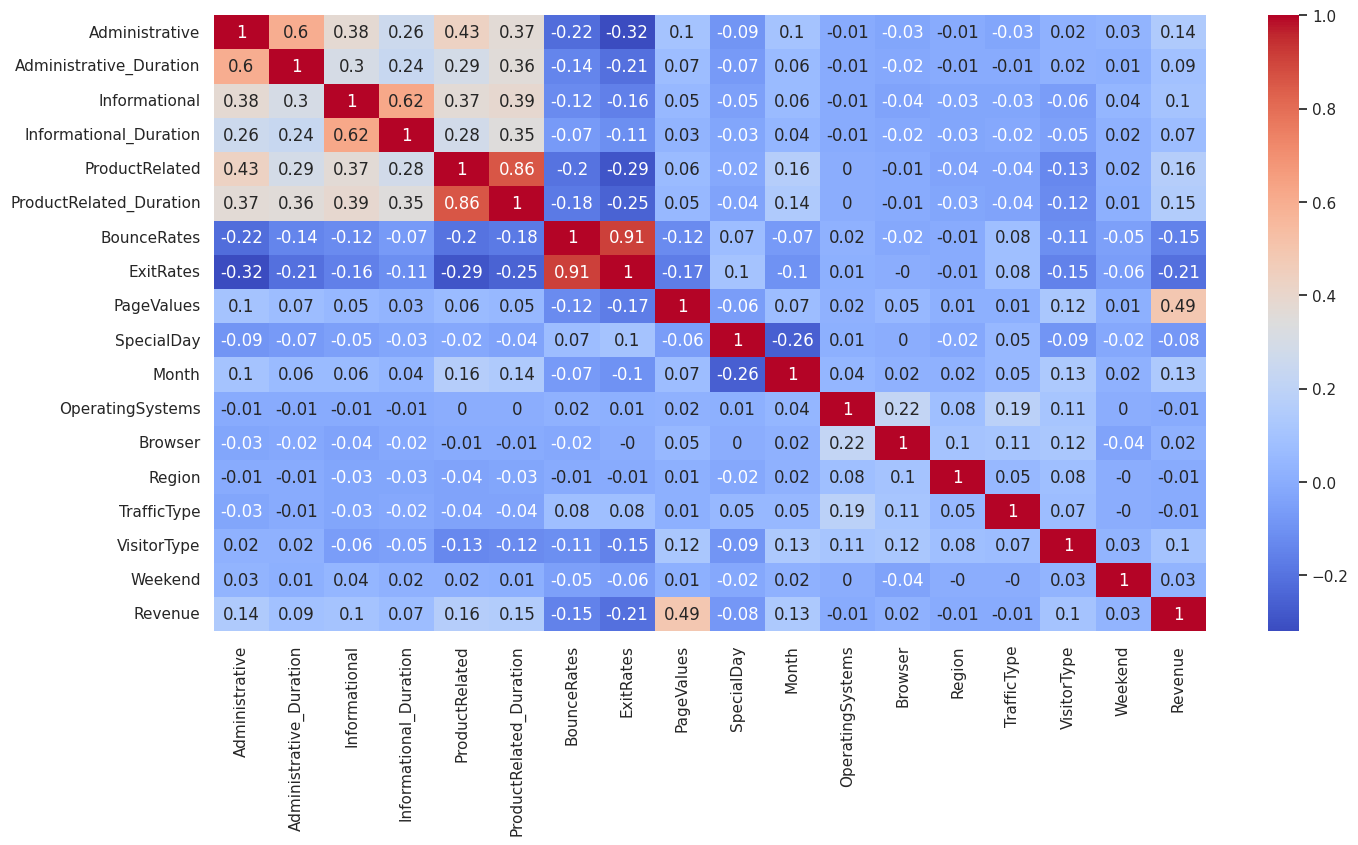

In [5]:
# Correlation Matrix

import seaborn as sns
sns.set(rc={'figure.figsize': (16, 8)})
sns.heatmap(df.corr().round(decimals=2,), annot=True, cmap='coolwarm',)

## Bounce Rates Compared to Features

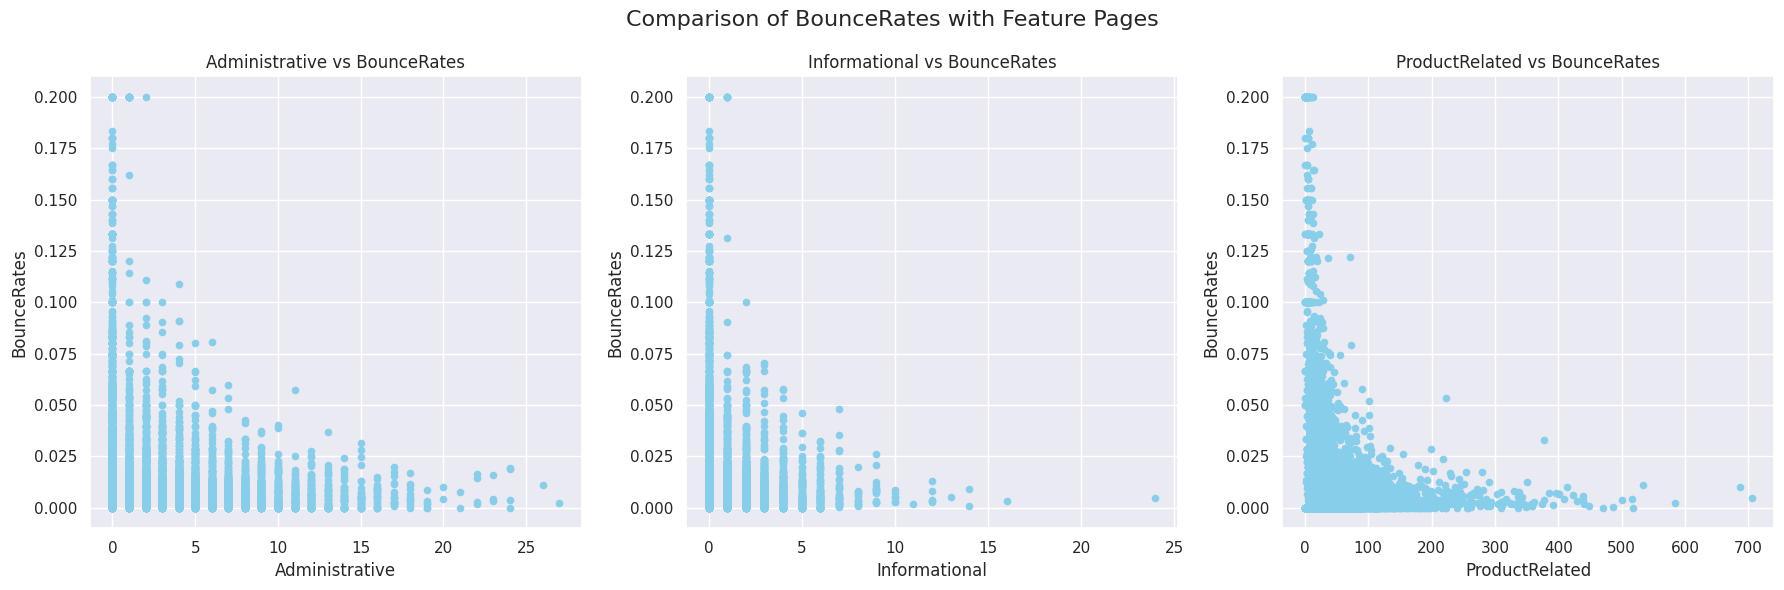

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# DataFrame
features_to_compare = [
    'Administrative',  
    'Informational',  
    'ProductRelated', 
]

selected_feature = 'BounceRates'

# New DataFrame with the selected feature and others for comparison
selected_df = df[features_to_compare + [selected_feature]]

# Plot bar charts for each feature against 'BounceRates'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # Adjusted to one row and three columns
fig.suptitle(f'Comparison of {selected_feature} with Feature Pages', fontsize=16)

for i, feature in enumerate(features_to_compare):
    col = i
    selected_df.plot(kind='scatter', x=feature, y=selected_feature, ax=axes[col], color='skyblue')
    axes[col].set_title(f'{feature} vs {selected_feature}')
    axes[col].set_xlabel(feature)
    axes[col].set_ylabel(selected_feature)

plt.tight_layout()
plt.show()

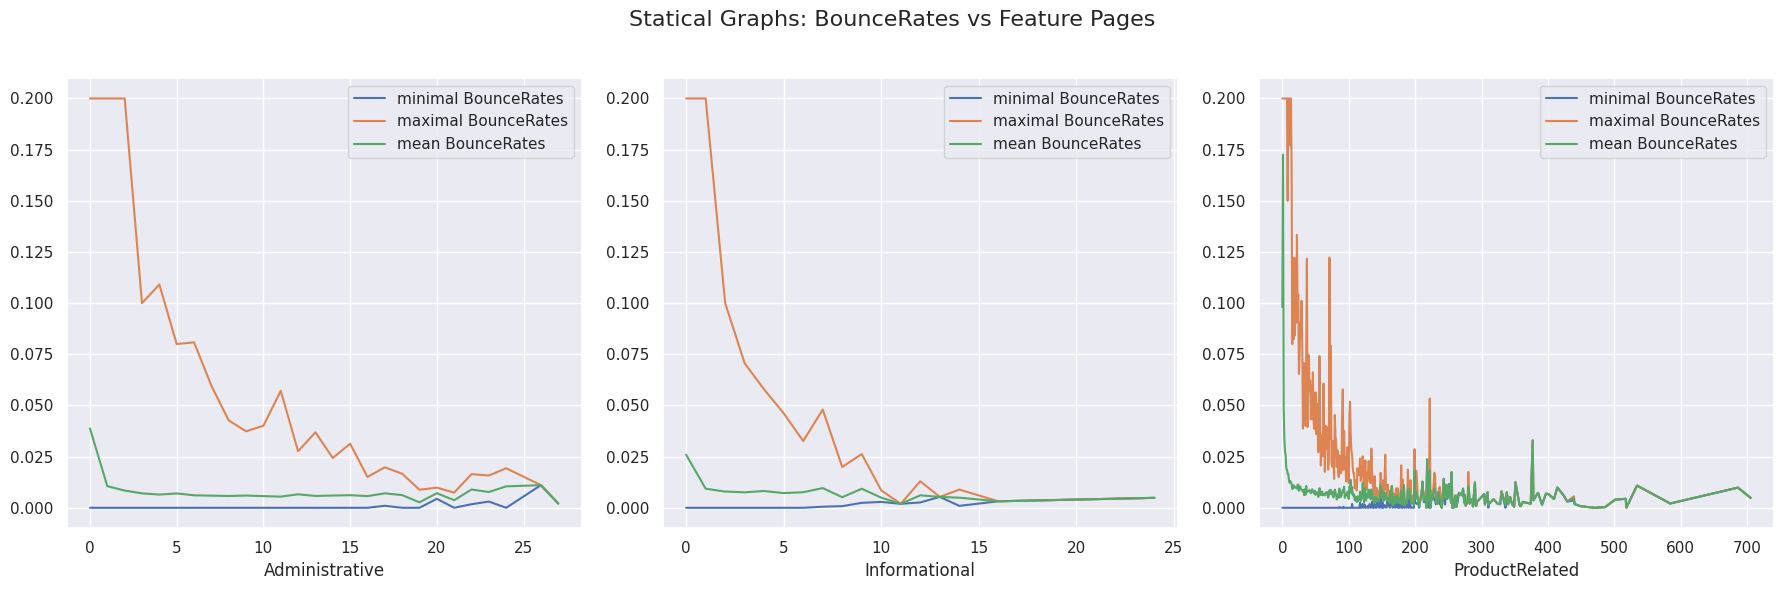

In [7]:
import pandas as pd

# DataFrame
features_to_compare = [
    'Administrative',  
    'Informational',  
    'ProductRelated', 
]

selected_feature = 'BounceRates'

# New DataFrame with the selected feature and others for comparison
selected_df = df[features_to_compare + [selected_feature]]

# Separate figure for similar graphs for each feature
fig, axes_similar = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle(f'Statical Graphs: {selected_feature} vs Feature Pages', fontsize=16)

for i, feature in enumerate(features_to_compare):
    col = i

    # Graph for each feature
    BounceRates_to_Feature = pd.DataFrame(
        df, columns=[feature, selected_feature])
    BounceRates_to_Feature[feature] = BounceRates_to_Feature[feature].round(
        decimals=3)
    pd.concat([
        BounceRates_to_Feature.groupby(feature).min().rename(
            columns={selected_feature: f'minimal {selected_feature}'}),
        BounceRates_to_Feature.groupby(feature).max().rename(
            columns={selected_feature: f'maximal {selected_feature}'}),
        BounceRates_to_Feature.groupby(feature).mean().rename(
            columns={selected_feature: f'mean {selected_feature}'}),
    ], axis=1,).plot(ax=axes_similar[col])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Exit Rates Compared to Features

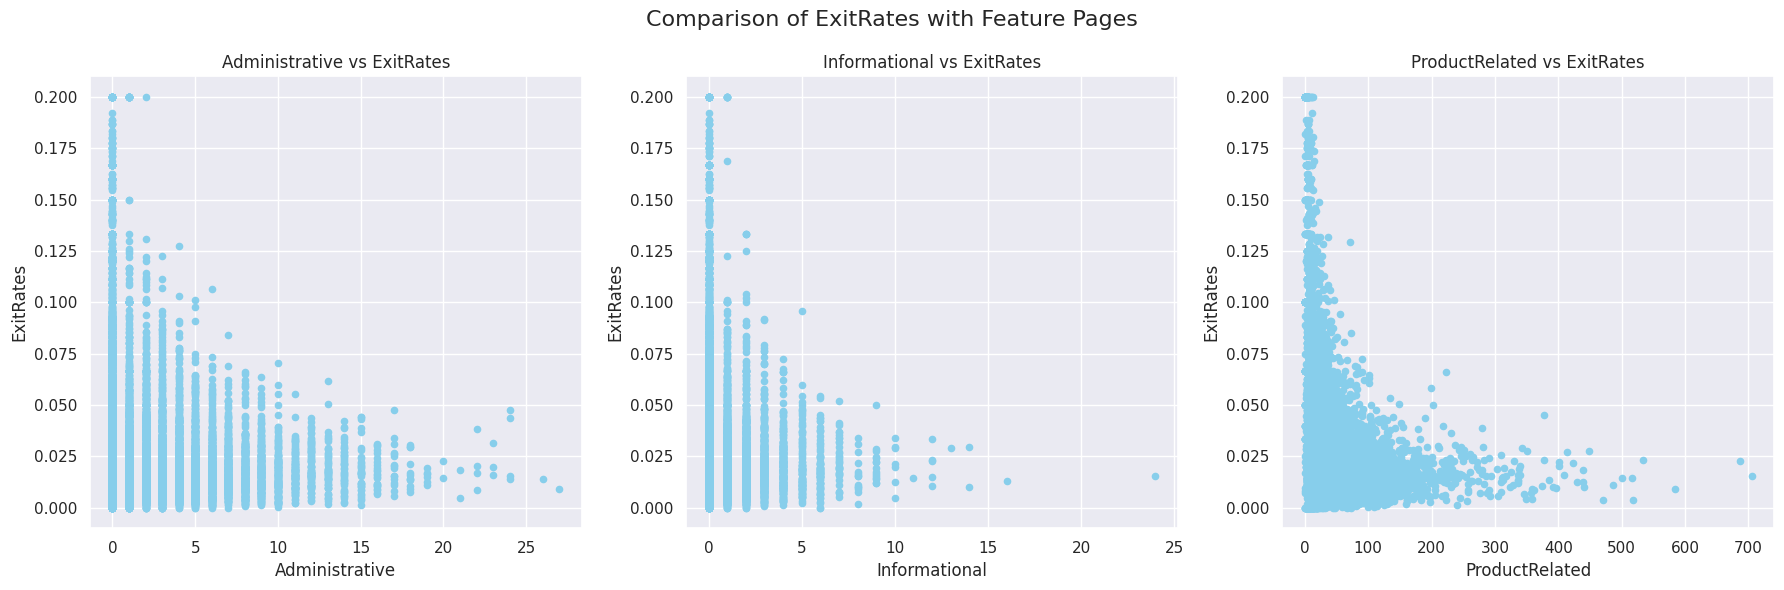

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# DataFrame
features_to_compare = [
    'Administrative',  
    'Informational',  
    'ProductRelated', 
]

selected_feature = 'ExitRates'

# New DataFrame with the selected feature and others for comparison
selected_df = df[features_to_compare + [selected_feature]]

# Plot bar charts for each feature against 'ExitRates'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # Adjusted to one row and three columns
fig.suptitle(f'Comparison of {selected_feature} with Feature Pages', fontsize=16)

for i, feature in enumerate(features_to_compare):
    col = i
    selected_df.plot(kind='scatter', x=feature, y=selected_feature, ax=axes[col], color='skyblue')
    axes[col].set_title(f'{feature} vs {selected_feature}')
    axes[col].set_xlabel(feature)
    axes[col].set_ylabel(selected_feature)

plt.tight_layout()
plt.show()

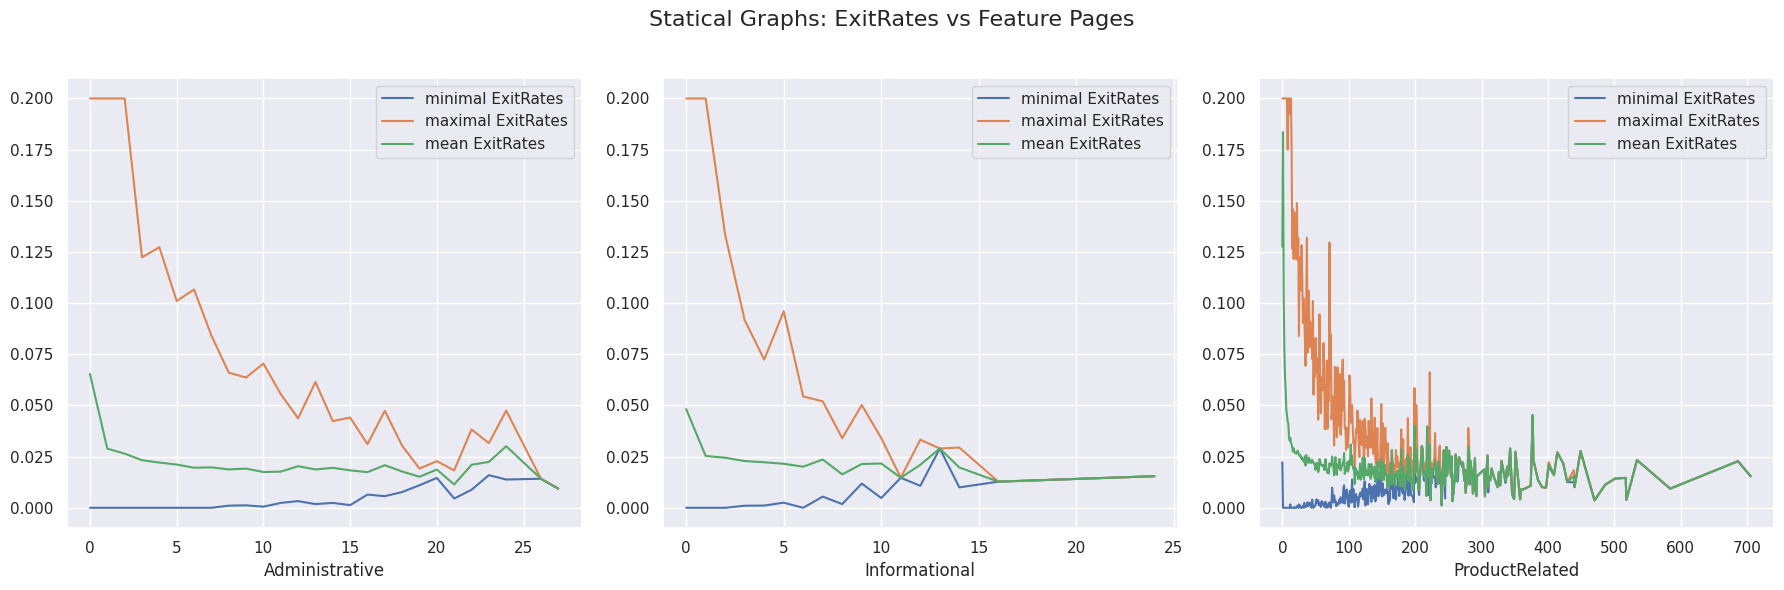

In [9]:
import pandas as pd

# DataFrame
features_to_compare = [
    'Administrative',  
    'Informational',  
    'ProductRelated', 
]

selected_feature = 'ExitRates'

# New DataFrame with the selected feature and others for comparison
selected_df = df[features_to_compare + [selected_feature]]

# Separate figure for similar graphs for each feature
fig, axes_similar = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle(f'Statical Graphs: {selected_feature} vs Feature Pages', fontsize=16)

for i, feature in enumerate(features_to_compare):
    col = i

    # Graph for each feature
    ExitRates_to_Feature = pd.DataFrame(
        df, columns=[feature, selected_feature])
    ExitRates_to_Feature[feature] = ExitRates_to_Feature[feature].round(
        decimals=3)
    pd.concat([
        ExitRates_to_Feature.groupby(feature).min().rename(
            columns={selected_feature: f'minimal {selected_feature}'}),
        ExitRates_to_Feature.groupby(feature).max().rename(
            columns={selected_feature: f'maximal {selected_feature}'}),
        ExitRates_to_Feature.groupby(feature).mean().rename(
            columns={selected_feature: f'mean {selected_feature}'}),
    ], axis=1,).plot(ax=axes_similar[col])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Page Value Compared to Features

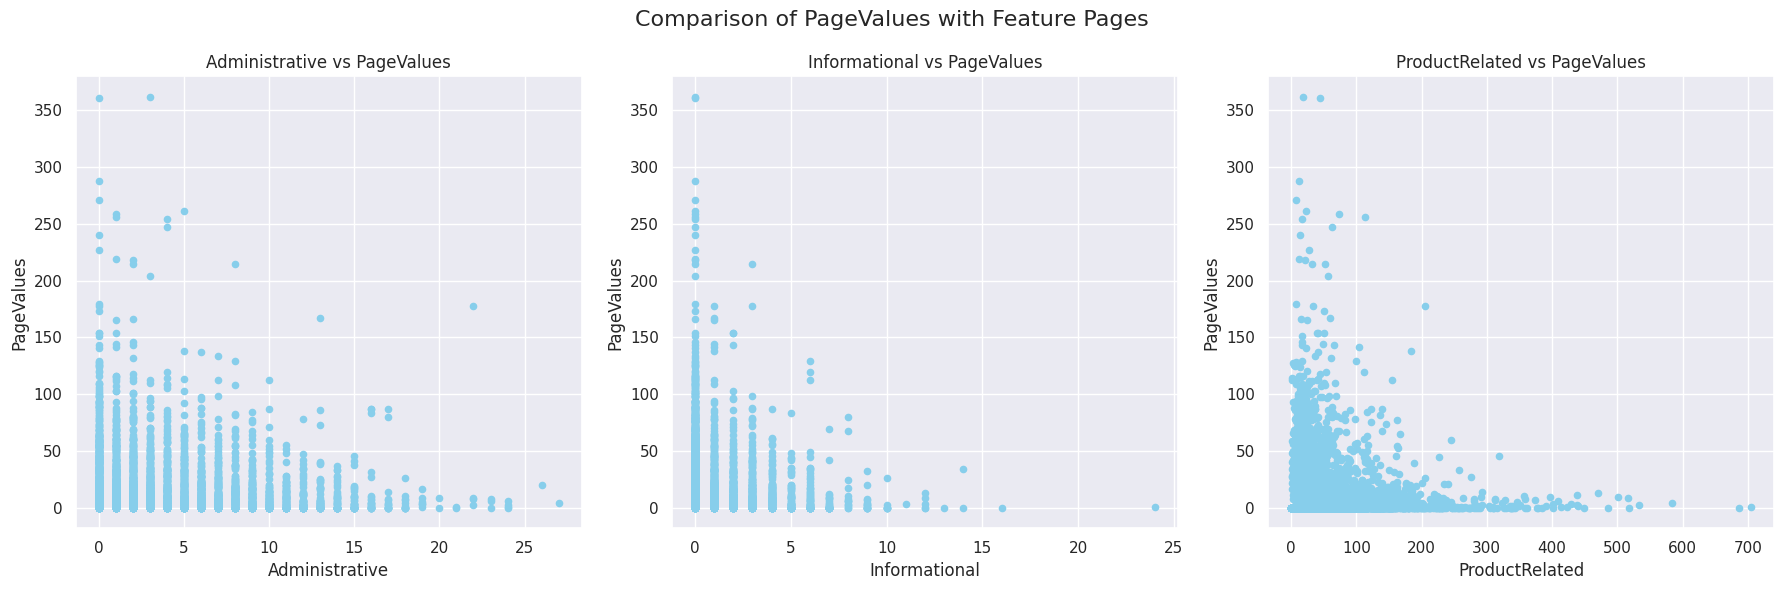

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# DataFrame
features_to_compare = [
    'Administrative',  
    'Informational',  
    'ProductRelated', 
]

selected_feature = 'PageValues'

# New DataFrame with the selected feature and others for comparison
selected_df = df[features_to_compare + [selected_feature]]

# Plot bar charts for each feature against 'PageValues'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # Adjusted to one row and three columns
fig.suptitle(f'Comparison of {selected_feature} with Feature Pages', fontsize=16)

for i, feature in enumerate(features_to_compare):
    col = i
    selected_df.plot(kind='scatter', x=feature, y=selected_feature, ax=axes[col], color='skyblue')
    axes[col].set_title(f'{feature} vs {selected_feature}')
    axes[col].set_xlabel(feature)
    axes[col].set_ylabel(selected_feature)

plt.tight_layout()
plt.show()

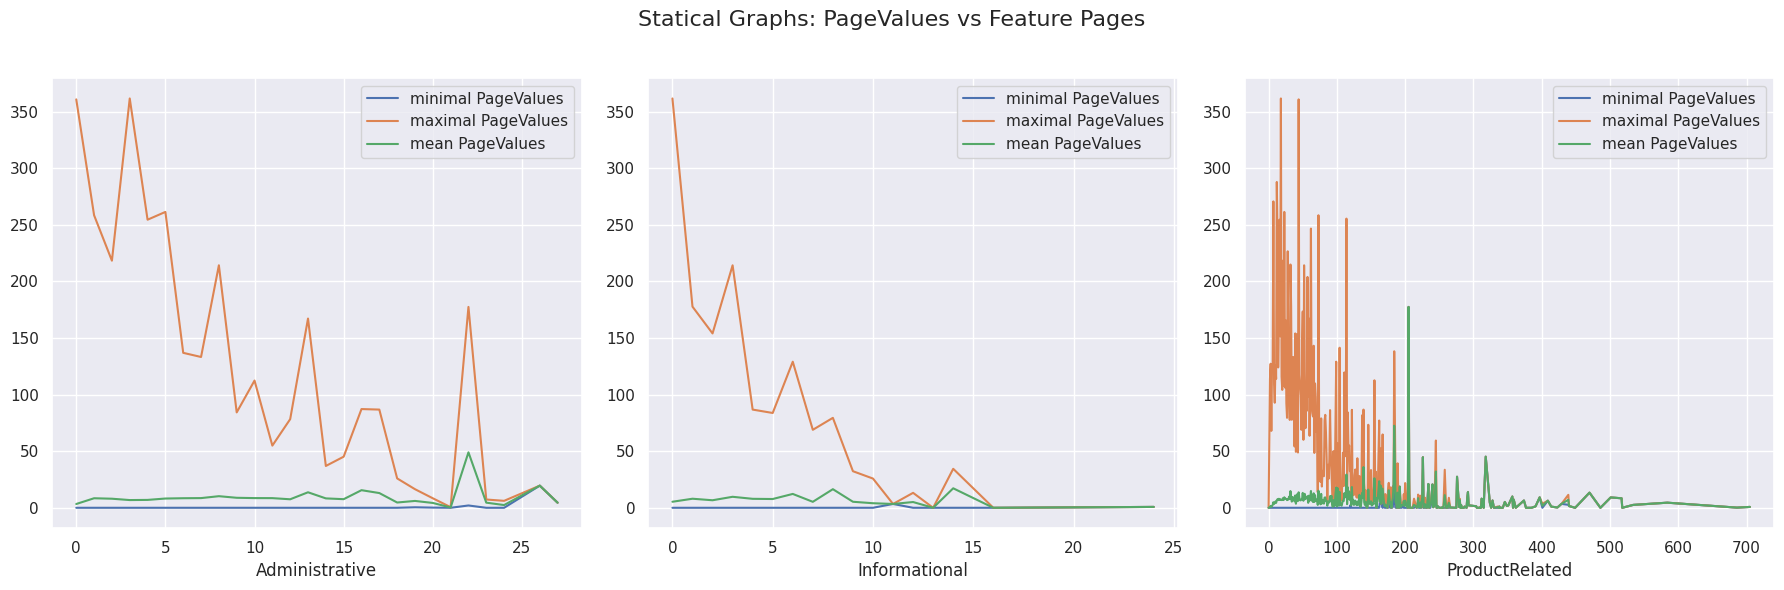

In [11]:
import pandas as pd

# DataFrame
features_to_compare = [
    'Administrative',  
    'Informational',  
    'ProductRelated', 
]

selected_feature = 'PageValues'

# New DataFrame with the selected feature and others for comparison
selected_df = df[features_to_compare + [selected_feature]]

# Separate figure for similar graphs for each feature
fig, axes_similar = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle(f'Statical Graphs: {selected_feature} vs Feature Pages', fontsize=16)

for i, feature in enumerate(features_to_compare):
    col = i

    # Graph for each feature
    PageValues_to_Feature = pd.DataFrame(
        df, columns=[feature, selected_feature])
    PageValues_to_Feature[feature] = PageValues_to_Feature[feature].round(
        decimals=3)
    pd.concat([
        PageValues_to_Feature.groupby(feature).min().rename(
            columns={selected_feature: f'minimal {selected_feature}'}),
        PageValues_to_Feature.groupby(feature).max().rename(
            columns={selected_feature: f'maximal {selected_feature}'}),
        PageValues_to_Feature.groupby(feature).mean().rename(
            columns={selected_feature: f'mean {selected_feature}'}),
    ], axis=1,).plot(ax=axes_similar[col])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Page Value Compared to Duration on Pages

In [12]:
# Debug purpose
df.head()

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


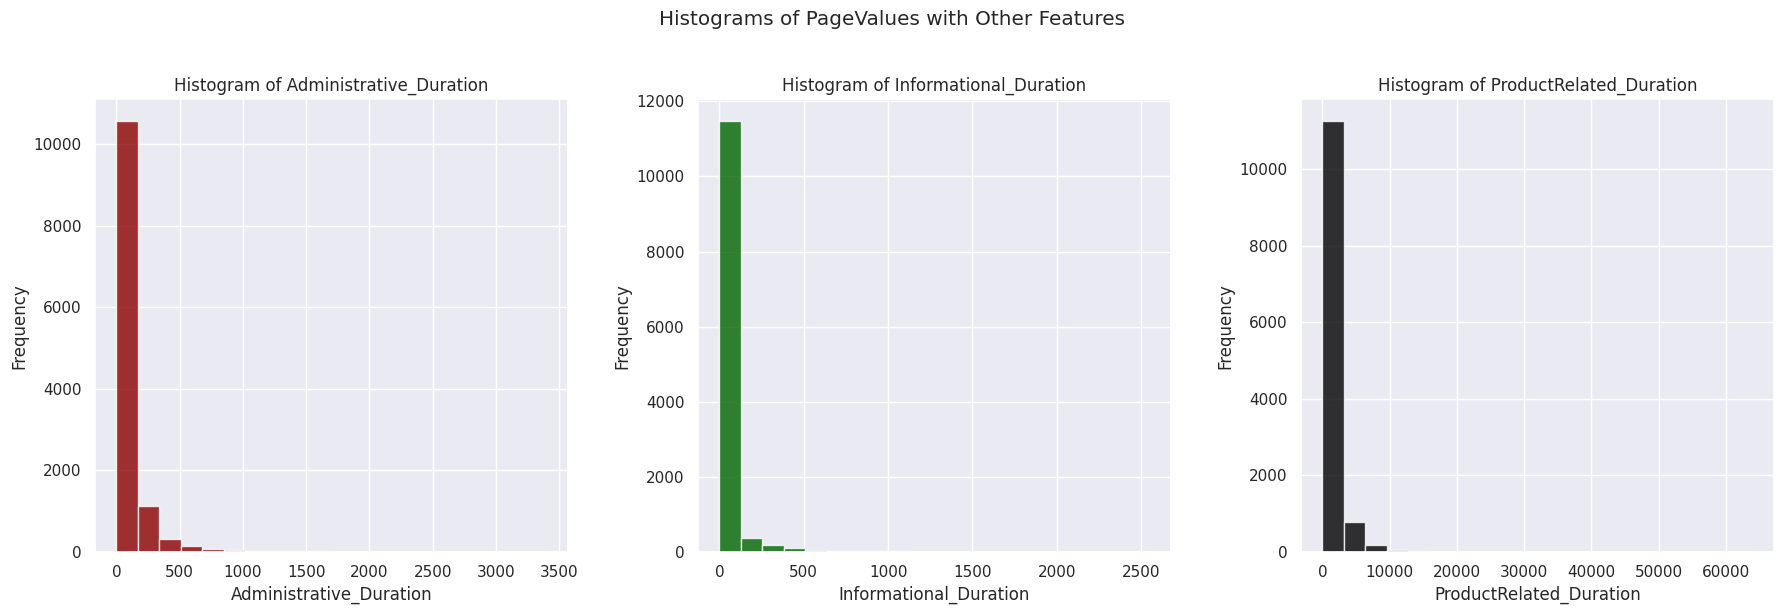

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame
features_to_compare = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
selected_feature = 'PageValues'

# New DataFrame with the selected features and 'PageValues'
selected_df = df[features_to_compare + [selected_feature]]

# Histograms for each feature
fig, axes = plt.subplots(nrows=1, ncols=len(features_to_compare), figsize=(18, 6))

colors = ['darkred', 'darkgreen', 'black']

for i, feature in enumerate(features_to_compare):
    axes[i].hist(selected_df[feature], bins=20, color=colors[i], alpha=0.8)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.suptitle(f'Histograms of {selected_feature} with Other Features', y=1.02)
plt.tight_layout(w_pad=2)
plt.show()

## Revenue Analysis

In [14]:
import plotly.express as px
import pandas as pd

# Mapping of numerical values to names
category_mapping = {
    0: 'Returning Visitor',
    1: 'New Visitor',
    2: 'Other'
}

# Map numerical values to names in the DataFrame
df['VisitorType'] = df['VisitorType'].map(category_mapping)

# Pie chart
visitor_type_counts = df['VisitorType'].value_counts().reset_index()
visitor_type_counts.columns = ['VisitorType', 'Count']

colors = px.colors.qualitative.Set1 
fig1 = px.pie(visitor_type_counts, values='Count', names='VisitorType', hole=0.4, 
              color_discrete_sequence=colors, labels={'VisitorType': 'Visitor Type', 'Count': 'No. Of Samples'},
              title='Visitor Type Distribution',
              category_orders={'VisitorType': list(category_mapping.values())})  # Set by category order

# fig1.update_traces(textposition='inside', textinfo='percent+label')
fig1.update_layout(showlegend=True) 

fig1.show()

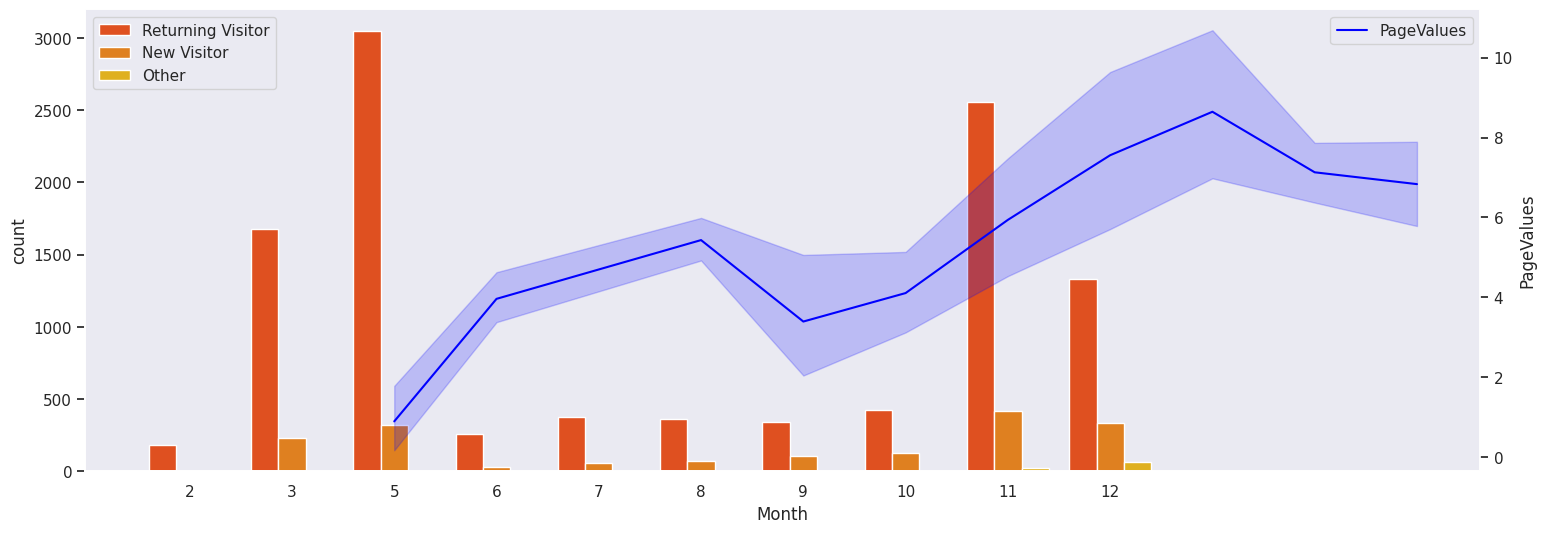

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Figure size and style
plt.figure(figsize=(18, 6))
sns.set_theme(style="dark")

# Countplot for VisitorType
ax = sns.countplot(x="Month", hue="VisitorType", palette='autumn', data=df)

# Secondary y-axis for line plots
ax2 = ax.twinx()

# Line plot for PageValues
sns.lineplot(x="Month", y="PageValues", data=df, ax=ax2, color='blue', label='PageValues')

# Line plot for Revenue
# sns.lineplot(x="Month", y="Revenue", data=df, ax=ax2, color='black', label='Revenue')

# Legends
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

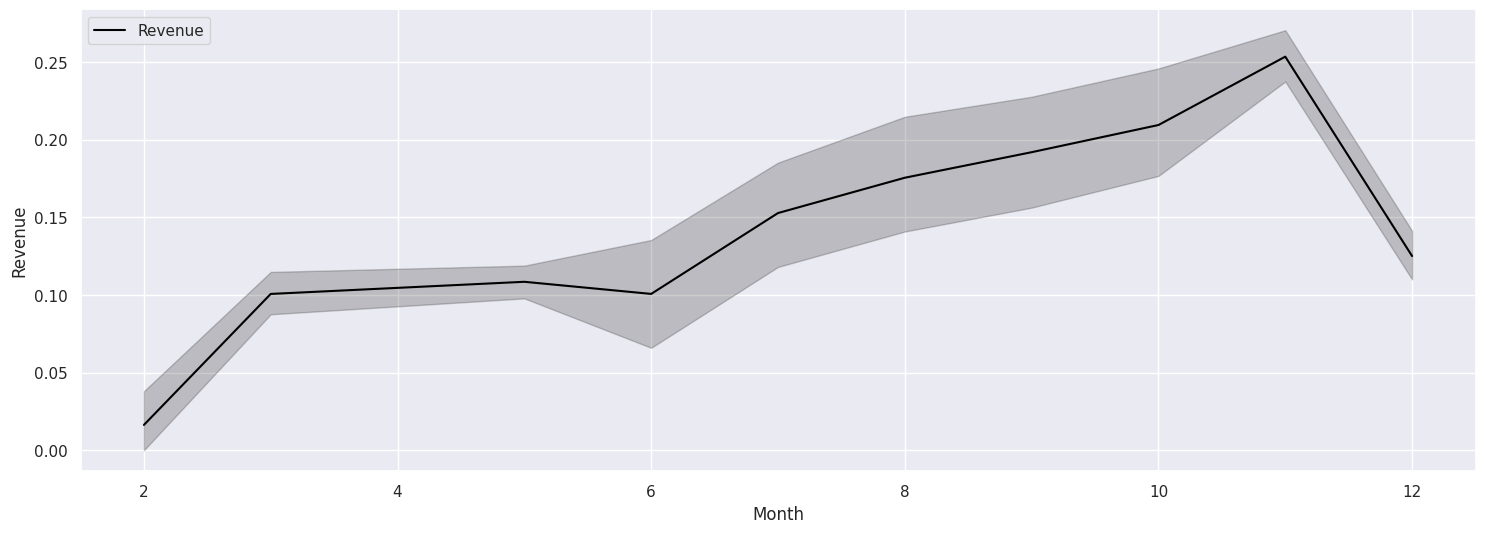

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Figure size and style
plt.figure(figsize=(18, 6))
sns.set_theme(style="darkgrid")

# Line plot for Revenue
sns.lineplot(x="Month", y="Revenue", data=df, color='black', label='Revenue')

# Legends
plt.legend(loc='upper left')

# Show the plot
plt.show()

In [17]:
# Value restore at 'VisitorType'
df.VisitorType = df.VisitorType.replace(
    {'Returning Visitor': '0', 
    'Other': '2',
    'New Visitor': '1', 
    }).astype(int)

# Debug purpose
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,1,0


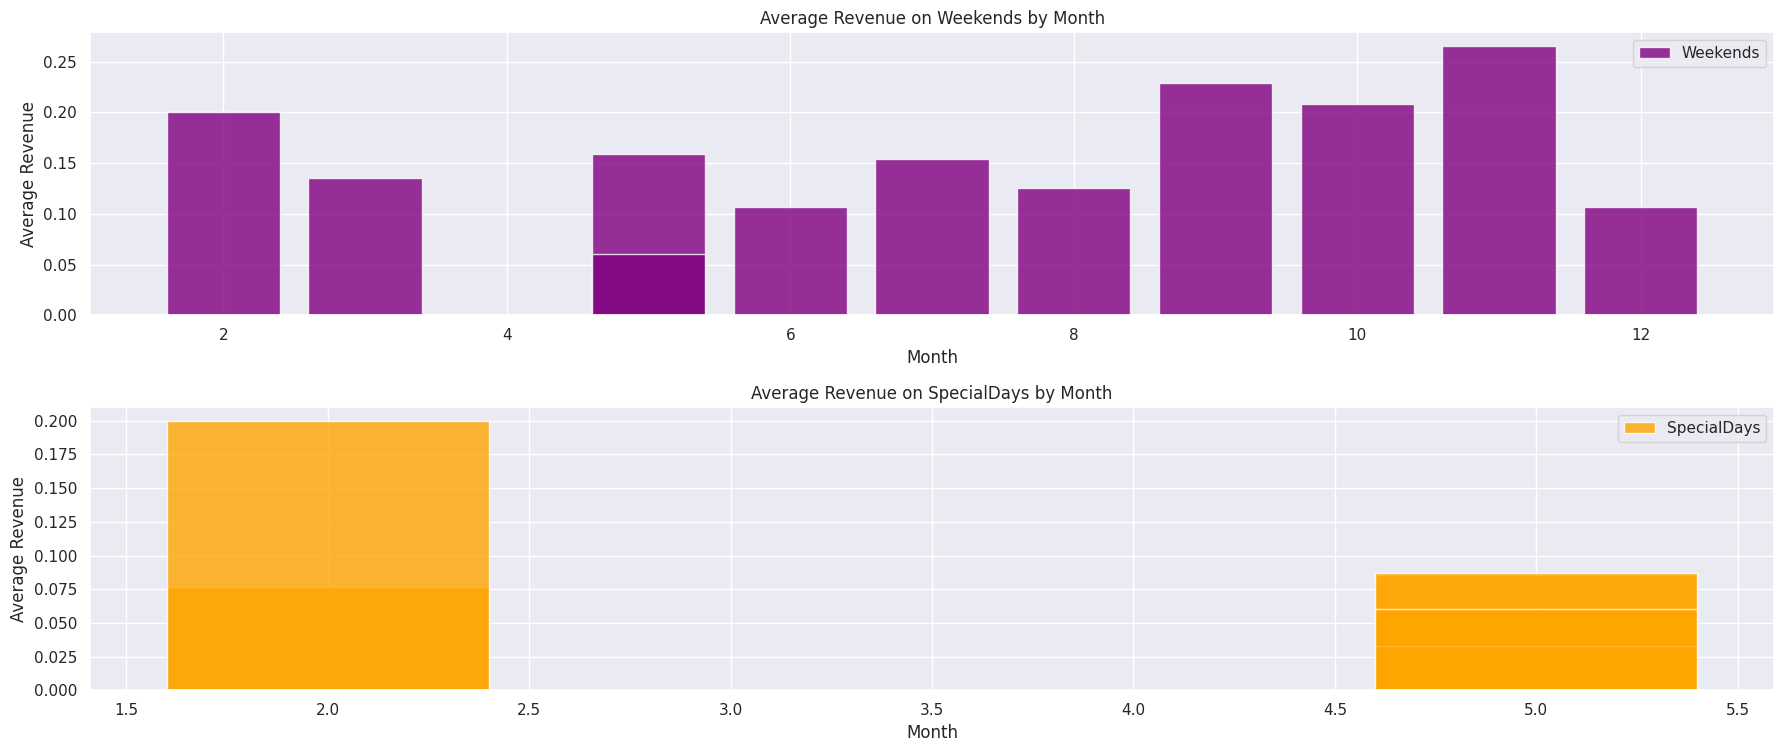

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame
features_to_compare = ['Weekend', 'SpecialDay', 'Revenue', 'Month']

# New DataFrame with the selected features
selected_df = df[features_to_compare]

# Group by Month and calculate mean Revenue for Weekends and SpecialDays
grouped_df = selected_df.groupby(['Month', 'Weekend', 'SpecialDay']).mean().reset_index()

# Filter Weekend and SpecialDay values
weekend_data = grouped_df[grouped_df['Weekend'] == 1]
specialday_data = grouped_df[grouped_df['SpecialDay'] > 0]

# Set custom colors
colors = ['purple', 'orange']

# Plot bar graphs with custom colors
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 8))

for i, data, label in zip(range(2), [weekend_data, specialday_data], ['Weekends', 'SpecialDays']):
    axes[i].bar(data['Month'], data['Revenue'], color=colors[i], alpha=0.8, label=label)
    axes[i].set_title(f'Average Revenue on {label} by Month')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Average Revenue')
    axes[i].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## System and Region Based Analysis

In [19]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,1,0


In [20]:
# DataFrame
selected_features = ['Region', 'Browser', 'OperatingSystems', 'TrafficType']

# Extract unique values for each selected feature
for feature in selected_features:
    unique_values = df[feature].unique()
    print(f"Unique values for {feature}:", unique_values)

Unique values for Region: [1 9 2 3 4 5 6 7 8]
Unique values for Browser: [ 1  2  3  4  5  6  7 10  8  9 12 13 11]
Unique values for OperatingSystems: [1 2 4 3 7 6 8 5]
Unique values for TrafficType: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]


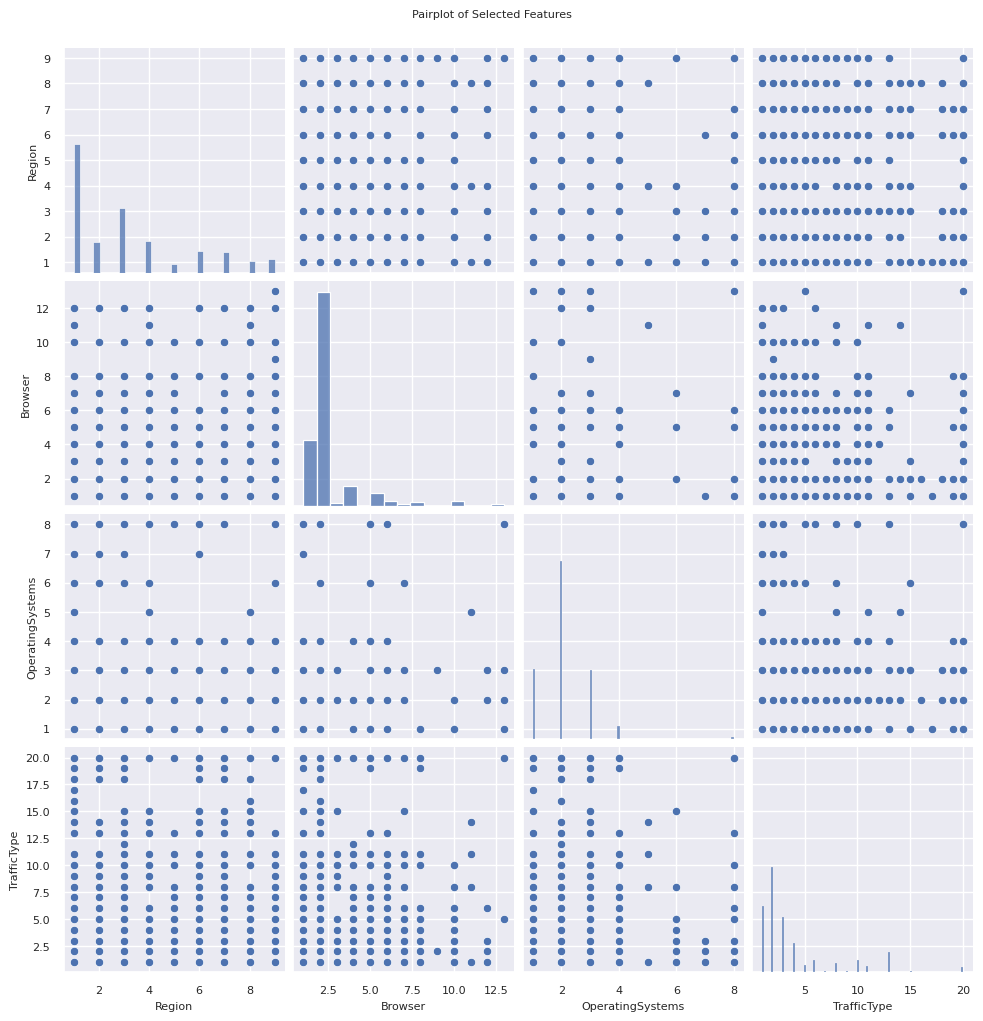

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# DataFrame
selected_features = ['Region', 'Browser', 'OperatingSystems', 'TrafficType']

# Set font size for the entire pairplot
sns.set_theme(style="darkgrid", 
              rc={"axes.labelsize": 8, "axes.titlesize": 8, "xtick.labelsize": 8, "ytick.labelsize": 8})

# Pairplot to visualize pairwise relationships
pairplot = sns.pairplot(df[selected_features], aspect=1)
pairplot.fig.suptitle("Pairplot of Selected Features", y=1.02, fontsize=8)
plt.show()

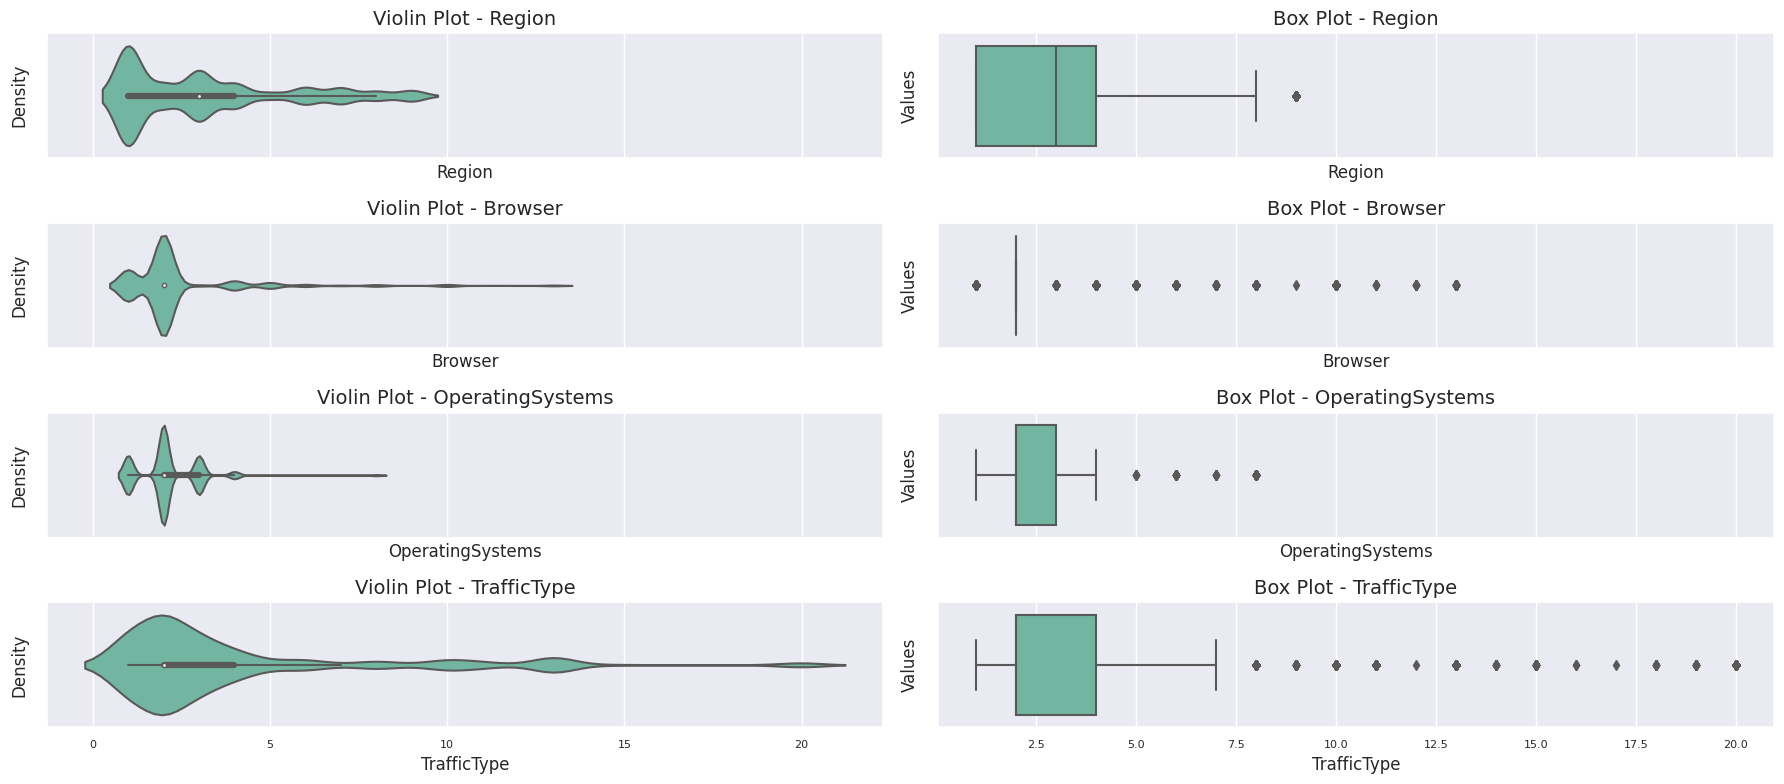

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# DataFrame
selected_features = ['Region', 'Browser', 'OperatingSystems', 'TrafficType']

# Violin and Box plots for each feature
fig, axes = plt.subplots(nrows=len(selected_features), ncols=2, figsize=(18, 2 * len(selected_features)), sharex='col')

for i, feature in enumerate(selected_features):
    sns.violinplot(x=feature, data=df, ax=axes[i, 0], palette='Set2')
    axes[i, 0].set_title(f'Violin Plot - {feature}', fontsize=14)
    axes[i, 0].set_xlabel(feature, fontsize=12)
    axes[i, 0].set_ylabel('Density', fontsize=12)

    sns.boxplot(x=feature, data=df, ax=axes[i, 1], palette='Set2')
    axes[i, 1].set_title(f'Box Plot - {feature}', fontsize=14)
    axes[i, 1].set_xlabel(feature, fontsize=12)
    axes[i, 1].set_ylabel('Values', fontsize=12)

plt.tight_layout()
plt.show()

# K-Means Clustering

In [23]:
# Debug purpose
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,1,0


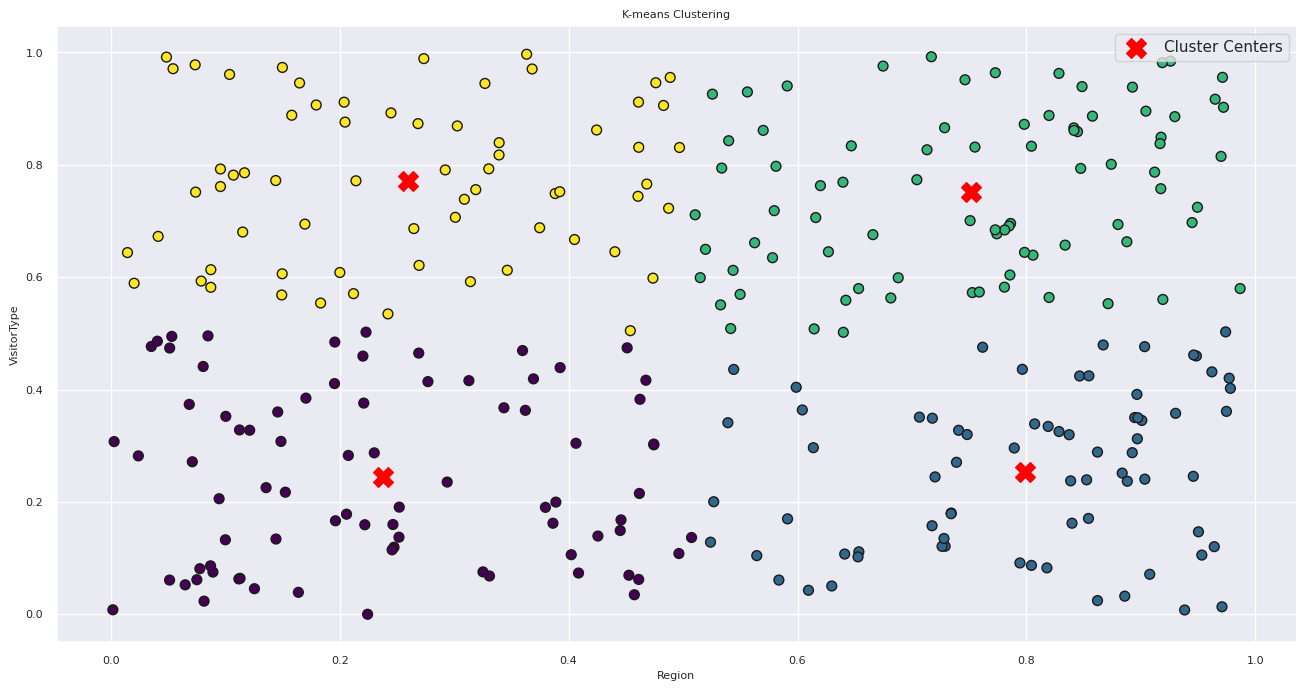

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# DataFrame
df = pd.DataFrame(data=np.random.rand(300, 2), columns=["Region", "VisitorType"])

# Extract feature values from the DataFrame
Region = df["Region"].values
VisitorType = df["VisitorType"].values

# Combine features into a 2D array
X = np.column_stack((Region, VisitorType))

# Specify the number of clusters (K)
num_clusters = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(X)

# Get cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plot the data points and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-means Clustering')
plt.xlabel('Region')
plt.ylabel('VisitorType')
plt.legend()
plt.show()

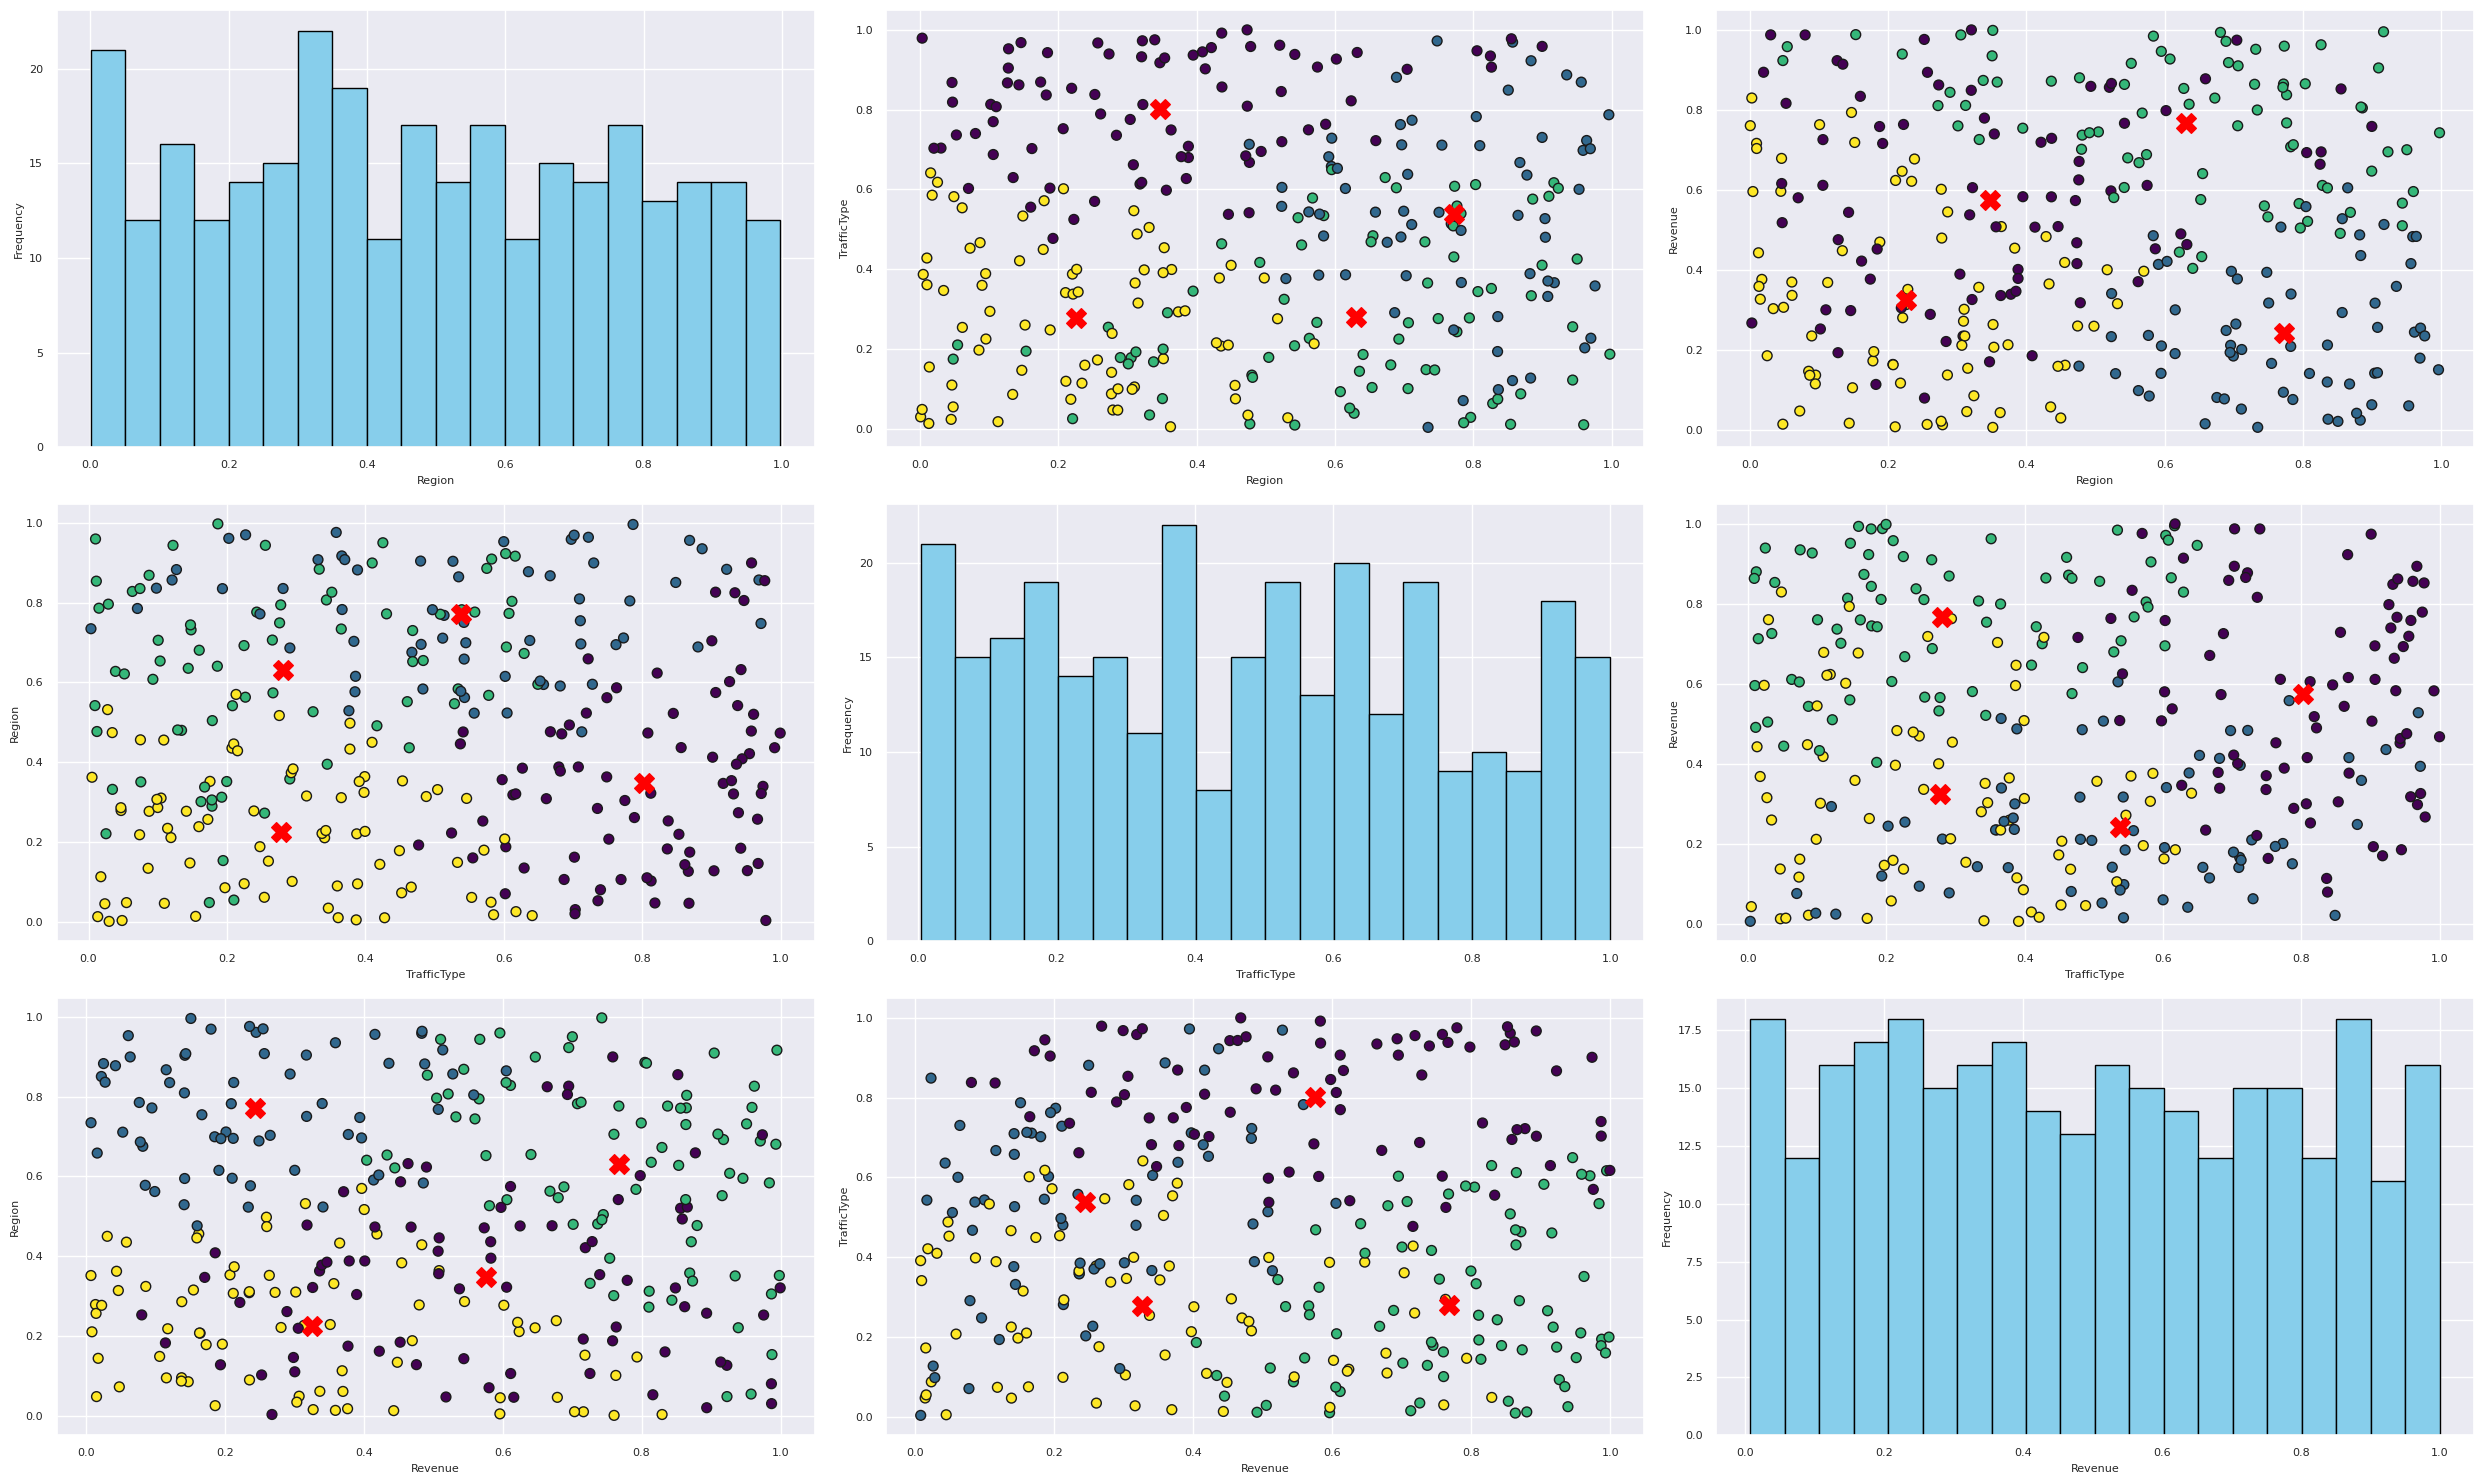

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have a DataFrame named df with multiple features
# Replace df with your actual DataFrame
df = pd.DataFrame(data=np.random.rand(300, 3), columns=['Region', 'TrafficType', 'Revenue'])

# Extract feature values from the DataFrame
features = df.values

# Specify the number of clusters (K)
num_clusters = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(features)

# Get cluster labels
labels = kmeans.labels_

# Create a matrix of scatter plots for each pair of features
feature_names = df.columns
num_features = len(feature_names)

fig, axes = plt.subplots(nrows=num_features, ncols=num_features, figsize=(25, 15))

for i in range(num_features):
    for j in range(num_features):
        ax = axes[i, j]
        
        if i == j:
            # Plot histograms on the diagonal
            ax.hist(features[:, i], bins=20, color='skyblue', edgecolor='black')
            ax.set_xlabel(feature_names[i])
            ax.set_ylabel('Frequency')
        else:
            # Scatter plot for non-diagonal pairs
            ax.scatter(features[:, i], features[:, j], c=labels, cmap='viridis', edgecolors='k', s=50)
            ax.scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, j], c='red', marker='X', s=200, label='Cluster Centers')
            ax.set_xlabel(feature_names[i])
            ax.set_ylabel(feature_names[j])

plt.tight_layout()
plt.show()